In [21]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler


Kmeans : k points, called means or cluster centroids, randomly.  
Kmeans++ : ensures a smarter initialization of the centroids and improves the quality of the clustering and remaing is same as              Kmeans.   
standardscaler use normal distribution and value lies [0,1].  
minmaxscaler lies[-1,1]


In [2]:
df = pd.read_csv(r'C:\Users\PULAPA YESHWANTH\Downloads\Carbon_Emission\CarbonEmissionIndia.csv')

In [3]:
df.head()

,States,per capita CO2 (kg per person),per capita CO (kg per person),per capita CH4 (kg per person)
0,Andhra Pradesh,974.17,27.18,16.97
1,Arunachal,405.90,17.43,25.82
2,Assam,340.91,16.63,21.29
3,Bihar,179.01,8.83,9.59
4,Chattisgarh,1963.88,17.56,22.37


In [4]:
df.describe()

,per capita CO2 (kg per person),per capita CO (kg per person),per capita CH4 (kg per person)
count,28.000000,28.000000,28.000000
mean,894.401071,18.293214,16.549286
std,547.619397,5.258928,6.599384
min,179.010000,8.830000,4.520000
25%,505.025000,14.847500,11.830000
50%,771.625000,17.495000,15.690000
75%,1058.092500,23.235000,20.232500
max,2662.510000,27.900000,33.380000


In [5]:
df.isnull().sum()

States                            0
per capita CO2 (kg per person)    0
per capita CO (kg per person)     0
per capita CH4 (kg per person)    0
dtype: int64

In [14]:
x = df.drop('States',axis='columns')
ss = StandardScaler()
ss.fit(x)
scaled_features = ss.transform(x)
scaled_features



array([[ 1.48337881e-01,  1.72085649e+00,  6.49203733e-02],
       [-9.08414027e-01, -1.67154690e-01,  1.43056286e+00],
       [-1.02926909e+00, -3.22068428e-01,  7.31539079e-01],
       [-1.33033748e+00, -1.83247737e+00, -1.07388658e+00],
       [ 1.98879740e+00, -1.41981207e-01,  8.98193755e-01],
       [ 3.28796608e+00,  9.34669272e-01, -1.37787706e+00],
       [ 7.73924150e-01,  1.10701081e+00, -6.61879188e-01],
       [ 9.06476064e-01, -7.61428685e-02,  7.74745847e-01],
       [-2.05003718e-01, -2.54293667e-01,  2.67066323e-01],
       [-7.16634021e-01, -5.23456287e-01, -3.28569835e-01],
       [ 9.46587522e-01, -6.33832325e-01, -1.78889246e-01],
       [-1.03041473e-02,  1.28516160e+00, -6.71137781e-01],
       [-2.12516480e-01, -6.22421269e-04, -1.85623770e+00],
       [-4.42641330e-01, -4.16953092e-01, -2.15923618e-01],
       [ 7.86588654e-02,  1.02374467e+00, -1.04148151e+00],
       [-9.58065207e-01, -1.45100229e+00,  9.38314326e-01],
       [-3.77257979e-01, -1.09276427e+00

# Elbow Plot

In [24]:
sse = []
kc = range(1,10)
for k in range(1,10):
    km = KMeans(n_clusters=k)
    km.fit(df[['per capita CO2 (kg per person)','per capita CO (kg per person)','per capita CH4 (kg per person)']])
    sse.append(km.inertia_)
    

C:\Users\PULAPA YESHWANTH\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


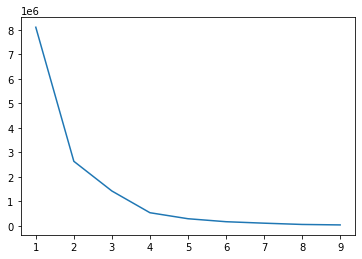

In [26]:
plt.plot(kc,sse)

4 is the elbow point

In [46]:
km = KMeans(n_clusters=4)
num_cluster = km.fit_predict(x.values,)

In [47]:
df["cluster"] = num_cluster
x["cluster"] = num_cluster

In [48]:
df.head()

,States,per capita CO2 (kg per person),per capita CO (kg per person),per capita CH4 (kg per person),cluster
0,Andhra Pradesh,974.17,27.18,16.97,2
1,Arunachal,405.90,17.43,25.82,3
2,Assam,340.91,16.63,21.29,3
3,Bihar,179.01,8.83,9.59,3
4,Chattisgarh,1963.88,17.56,22.37,1


<AxesSubplot:>

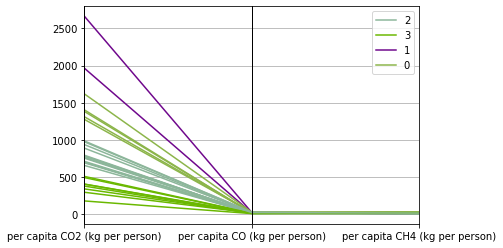

In [49]:
pd.plotting.parallel_coordinates(x, 'cluster')

<AxesSubplot:>

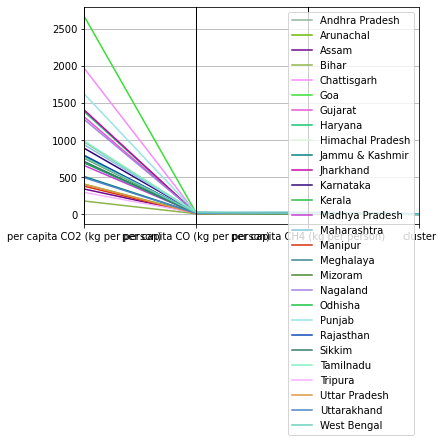

In [44]:
pd.plotting.parallel_coordinates(df,'States')